## **Breast Cancer Prediction Using multiple models**

---



#### Exploratory Data Analysis

In [30]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file using pandas

df = pd.read_csv('/content/breast_cancer_data.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.shape

(569, 31)

In [4]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


We do not have any missing values in our dataset

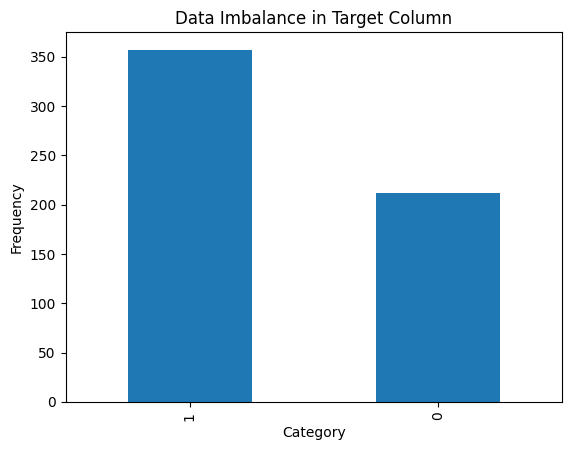

In [59]:
# Checking the data imbalance in the target column
df['target'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Data Imbalance in Target Column')
plt.show()

There is data imbalance in the target so we have to consider this senario to check the evaluation metrics (accuracy can't be considered)

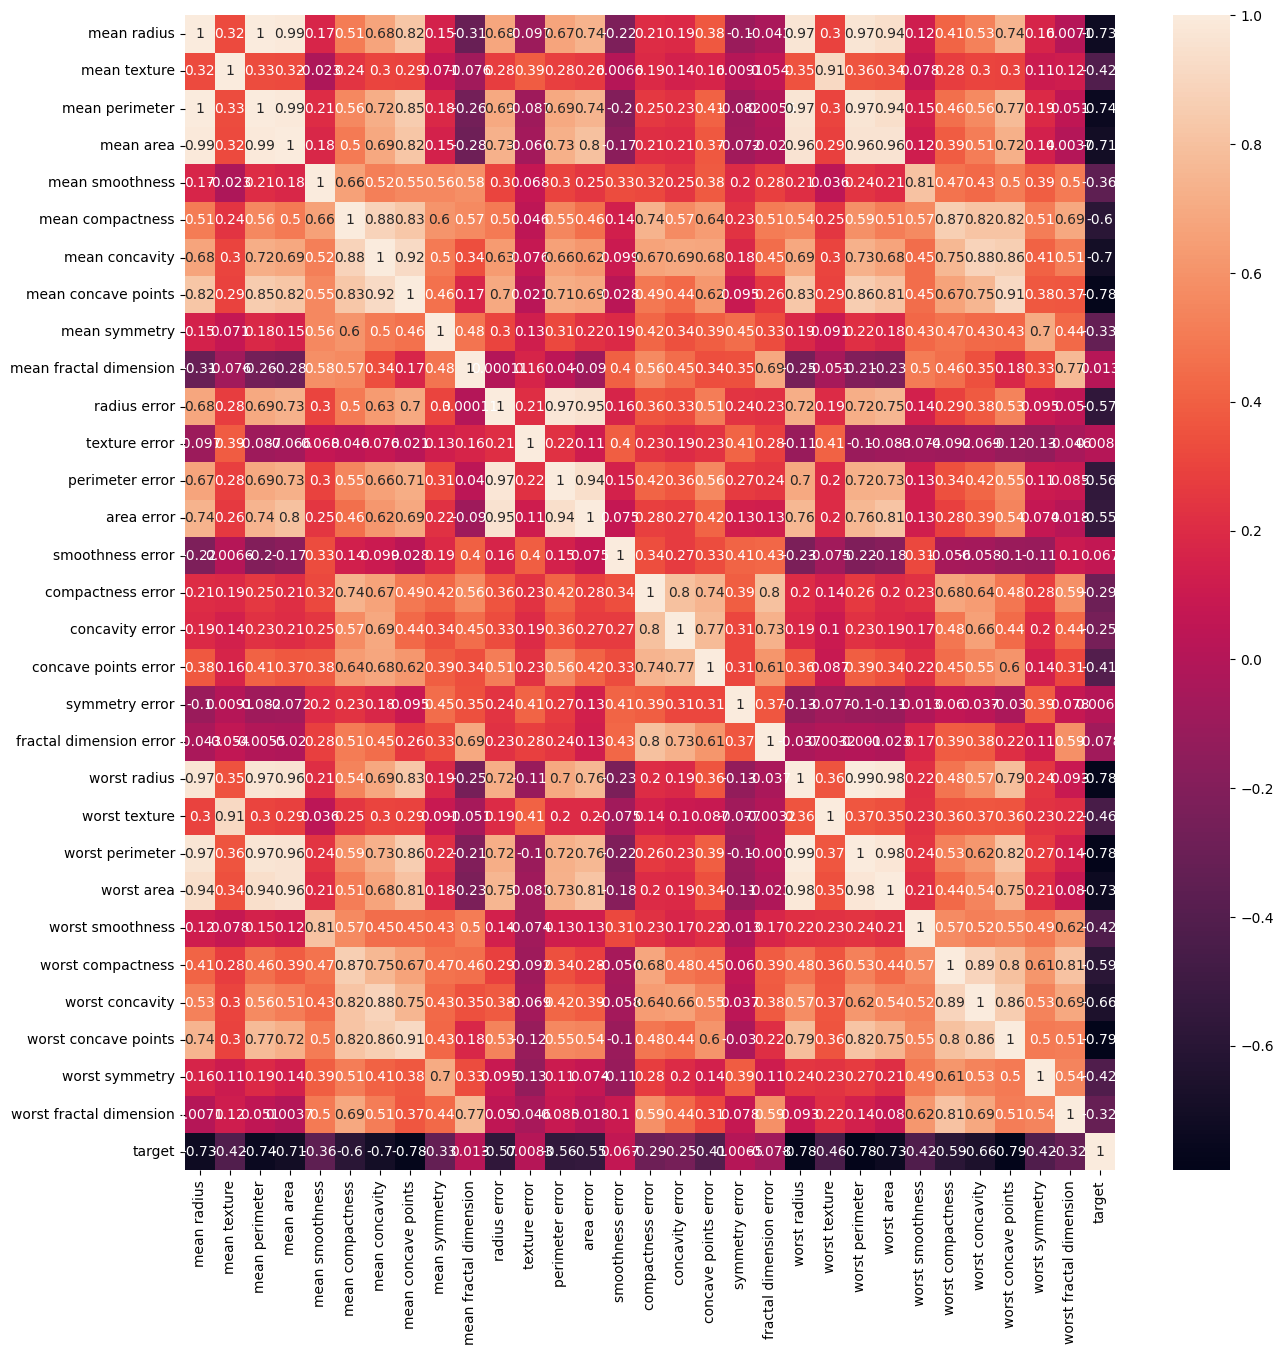

In [9]:
df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

Target has good correation with many of the features

#### Modeling

In [10]:
# Create feature dataset and target dataset

X = df.drop('target', axis = 1)
y = df['target']
X.shape, y.shape

((569, 30), (569,))

In [11]:
# Spliting the data 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [12]:
# Standerdising the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Logistic Regression Model**

---



In [13]:
model_log = LogisticRegression()
model_log.fit(X_train, y_train)
y_pred_log = model_log.predict(X_test)
y_pred_log[:10]

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [14]:
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
confusion_mat_log = confusion_matrix(y_test, y_pred_log)
classification_rep_log = classification_report(y_test, y_pred_log)
print(f"Accuracy : {accuracy_log}")
print(f"Precision : {precision_log}")
print(f"Recall : {recall_log}")
print(f"Confusion Matrix : \n{confusion_mat_log}")
print(f"Classification Report : \n{classification_rep_log}")

Accuracy : 0.9736842105263158
Precision : 0.9855072463768116
Recall : 0.9714285714285714
Confusion Matrix : 
[[43  1]
 [ 2 68]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        44
           1       0.99      0.97      0.98        70

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



**Decision Tree Model**

---



In [19]:
model_dtree = DecisionTreeClassifier()
model_dtree.fit(X_train, y_train)
y_pred_dtree = model_dtree.predict(X_test)
y_pred_dtree[:10]

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [20]:
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
precision_dtree = precision_score(y_test, y_pred_dtree)
recall_dtree = recall_score(y_test, y_pred_dtree)
confusion_mat_dtree = confusion_matrix(y_test, y_pred_dtree)
classification_rep_dtree = classification_report(y_test, y_pred_dtree)
print(f"Accuracy : {accuracy_dtree}")
print(f"Precision : {precision_dtree}")
print(f"Recall : {recall_dtree}")
print(f"Confusion Matrix : \n{confusion_mat_dtree}")
print(f"Classification Report : \n{classification_rep_dtree}")

Accuracy : 0.9122807017543859
Precision : 0.9411764705882353
Recall : 0.9142857142857143
Confusion Matrix : 
[[40  4]
 [ 6 64]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        44
           1       0.94      0.91      0.93        70

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



**Support Vector Machine**

---



In [23]:
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
y_pred_svm[:10]

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [24]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
confusion_mat_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)
print(f"Accuracy : {accuracy_svm}")
print(f"Precision : {precision_svm}")
print(f"Recall : {recall_svm}")
print(f"Confusion Matrix : \n{confusion_mat_svm}")
print(f"Classification Report : \n{classification_rep_svm}")

Accuracy : 0.9824561403508771
Precision : 1.0
Recall : 0.9714285714285714
Confusion Matrix : 
[[44  0]
 [ 2 68]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      0.97      0.99        70

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



**Random Forest Model**

---



In [25]:
model_rforest = RandomForestClassifier()
model_rforest.fit(X_train, y_train)
y_pred_rforest = model_rforest.predict(X_test)
y_pred_rforest[:10]

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [26]:
accuracy_rforest = accuracy_score(y_test, y_pred_rforest)
precision_rforest = precision_score(y_test, y_pred_rforest)
recall_rforest = recall_score(y_test, y_pred_rforest)
confusion_mat_rforest = confusion_matrix(y_test, y_pred_rforest)
classification_rep_rforest = classification_report(y_test, y_pred_rforest)
print(f"Accuracy : {accuracy_rforest}")
print(f"Precision : {precision_rforest}")
print(f"Recall : {recall_rforest}")
print(f"Confusion Matrix : \n{confusion_mat_rforest}")
print(f"Classification Report : \n{classification_rep_rforest}")

Accuracy : 0.9649122807017544
Precision : 0.9852941176470589
Recall : 0.9571428571428572
Confusion Matrix : 
[[43  1]
 [ 3 67]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        44
           1       0.99      0.96      0.97        70

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



**KNN Model**

---



In [28]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
y_pred_knn[:10]

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [29]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
confusion_mat_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)
print(f"Accuracy : {accuracy_knn}")
print(f"Precision : {precision_knn}")
print(f"Recall : {recall_knn}")
print(f"Confusion Matrix : \n{confusion_mat_knn}")
print(f"Classification Report : \n{classification_rep_knn}")

Accuracy : 0.9912280701754386
Precision : 0.9859154929577465
Recall : 1.0
Confusion Matrix : 
[[43  1]
 [ 0 70]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        44
           1       0.99      1.00      0.99        70

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



**Principal Component Analysis**

---



In [33]:
pca = PCA(n_components = 30) # initially we are considering all the faetures. max value of  n_component should be min(records, features)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_varience = pca.explained_variance_ratio_
explained_varience

array([4.49238492e-01, 1.86527669e-01, 9.63693303e-02, 6.65969600e-02,
       5.24814237e-02, 3.95154062e-02, 2.23268720e-02, 1.57689645e-02,
       1.32126199e-02, 1.05779397e-02, 9.52340948e-03, 8.49541322e-03,
       7.95041513e-03, 5.23389569e-03, 3.05825416e-03, 2.50082581e-03,
       2.01920458e-03, 1.79764321e-03, 1.65490283e-03, 1.01939476e-03,
       9.40032632e-04, 8.63675543e-04, 7.79834748e-04, 5.32219559e-04,
       4.86552199e-04, 2.56443665e-04, 1.92561861e-04, 4.95287457e-05,
       2.57307029e-05, 4.38358346e-06])

In [35]:
Cum_exp_var = np.cumsum(explained_varience)
Cum_exp_var

array([0.44923849, 0.63576616, 0.73213549, 0.79873245, 0.85121388,
       0.89072928, 0.91305615, 0.92882512, 0.94203774, 0.95261568,
       0.96213909, 0.9706345 , 0.97858492, 0.98381881, 0.98687707,
       0.98937789, 0.9913971 , 0.99319474, 0.99484964, 0.99586904,
       0.99680907, 0.99767274, 0.99845258, 0.9989848 , 0.99947135,
       0.9997278 , 0.99992036, 0.99996989, 0.99999562, 1.        ])

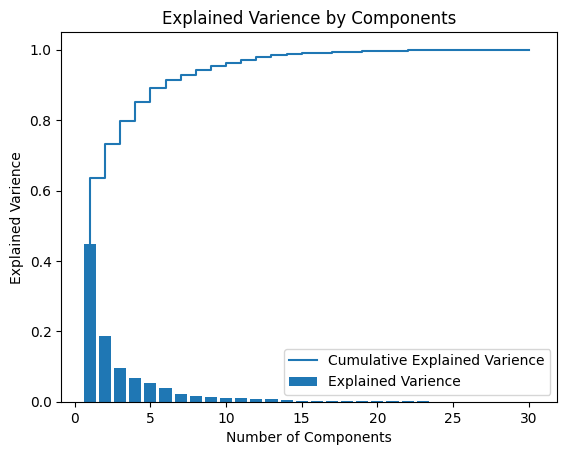

In [48]:
plt.bar(list(range(1,len(explained_varience)+1)), explained_varience, label = 'Explained Varience')
plt.xlabel('Number of Components')
plt.ylabel('Explained Varience')
plt.title('Explained Varience by Components')
plt.step(list(range(1,len(Cum_exp_var)+1)), Cum_exp_var, where = 'pre', label = 'Cumulative Explained Varience')
plt.legend()
plt.show()

In [49]:
pca = PCA(n_components = 8) # Here we are considering only 8 feature as we can nearly get 95% of accuracy
X_train_pca1 = pca.fit_transform(X_train)
X_test_pca1 = pca.transform(X_test)
explained_varience1 = pca.explained_variance_ratio_
explained_varience1

array([0.44923849, 0.18652767, 0.09636933, 0.06659696, 0.05248142,
       0.03951541, 0.02232687, 0.01576896])

In [50]:
svm_pca = SVC()
svm_pca.fit(X_train_pca1, y_train)
y_pred_svm_pca = svm_pca.predict(X_test_pca1)
y_pred_svm_pca[:10]

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [51]:
accuracy_svm_pca = accuracy_score(y_test, y_pred_svm_pca)
precision_svm_pca = precision_score(y_test, y_pred_svm_pca)
recall_svm_pca = recall_score(y_test, y_pred_svm_pca)
confusion_mat_svm_pca = confusion_matrix(y_test, y_pred_svm_pca)
classification_rep_svm_pca = classification_report(y_test, y_pred_svm_pca)

print(f"Accuracy : {accuracy_svm_pca}")
print(f"Precision : {precision_svm_pca}")
print(f"Recall : {recall_svm_pca}")
print(f"Confusion Matrix : \n{confusion_mat_svm_pca}")
print(f"Classification Report : \n{classification_rep_svm_pca}")
print(f"Explained Varience : {explained_varience1}")

Accuracy : 0.9824561403508771
Precision : 1.0
Recall : 0.9714285714285714
Confusion Matrix : 
[[44  0]
 [ 2 68]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      0.97      0.99        70

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114

Explained Varience : [0.44923849 0.18652767 0.09636933 0.06659696 0.05248142 0.03951541
 0.02232687 0.01576896]


Here we are getting the same performance for SVM venella and PCA SVM with only 8 features

**Model Comparision**

---



In [61]:
# Creating a DataFrame of models and evaluation metrics
Model_compare = pd.DataFrame({
    'Model' : ['LR', 'Decision Tree', 'SVM', 'Random Forest', 'KNN'],
    'Accuracy' : [accuracy_log, accuracy_dtree, accuracy_svm, accuracy_rforest, accuracy_knn],
    'Precision' : [precision_log, precision_dtree, precision_svm, precision_rforest, precision_knn],
    'Recall' : [recall_log, recall_dtree, recall_svm, recall_rforest, recall_knn]
})
Model_compare

,Model,Accuracy,Precision,Recall
0,LR,0.973684,0.985507,0.971429
1,Decision Tree,0.912281,0.941176,0.914286
2,SVM,0.982456,1.000000,0.971429
3,Random Forest,0.964912,0.985294,0.957143
4,KNN,0.991228,0.985915,1.000000


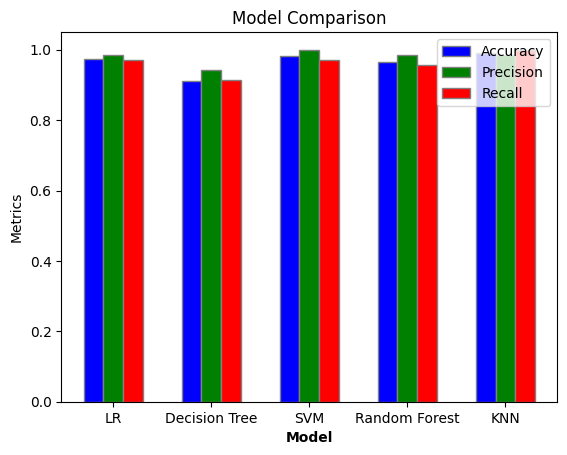

In [60]:
#ploting all the models Evaluation metrics

# Number of models
n_models = len(Model_compare['Model'])

# Setting the positions and width for the bars
bar_width = 0.2
r1 = np.arange(n_models)
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting the bars
plt.bar(r1, Model_compare['Accuracy'], color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, Model_compare['Precision'], color='g', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, Model_compare['Recall'], color='r', width=bar_width, edgecolor='grey', label='Recall')

# Adding the xticks
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + bar_width for r in range(n_models)], Model_compare['Model'])

# Adding labels and title
plt.ylabel('Metrics')
plt.title('Model Comparison')
plt.legend()

# Show the plot
plt.show()

Comparing the models we can see from the graph and conclude that KNN is beforming better and SVM the next amoung all the other classification models.